<a href="https://colab.research.google.com/github/AnuBanik/everup-repo/blob/main/Anuradha_3_2_Pandas_ClassNotes_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

Pandas is an open source library built on top of NumPy
* Allows for very fast analysis – data cleaning, preparationmodifications, etc.
* Built-in visualization features 
* Works well with all types of data.
* DataFrames
* Missing Data
* GroupBy
* Merging, Joining data
* etc, etc, etc

In [ ]:
#must import pandas to access its functions in your notebook
import pandas as pd
import numpy as np #we'll also use a little numpy

##Series in pandas

Series in Pandas have a labeled index and a datapoint. Series are a part of DataFrames. They are a one-dimensional ndarray with axis labels 


In [ ]:
#create a sample series

labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)

d = {'a':10, 'b':20, 'c':30}


In [ ]:
pd.Series(data = my_data, index=labels)

##Dataframes (df)

Dataframes (df) are a key part of pandas, they are two-dimensional, tabular data that allow you to work with data in columns and rows.

In [ ]:
#create a dataframe wiht random values using numpy

from numpy.random import randn

np.random.seed(123)

In [ ]:
df = pd.DataFrame(randn(5,4), #creating a new dataframe, with five rows, four columns
                  ['A','B','C','D','E'],['W','X','Y','Z']) #labeling the rows and columns

df

##Dealing with rows and columns

Select columns, pass a list of column names

In [ ]:
#returns a vertical slice of the data with only columns W,X
#does not affect the original dataframe

df[['W','X']]

Create new columns in dataframe

In [ ]:
df['new'] = df['W'] + df['Y']

df

Deleting columns

In [ ]:
#delete using df.drop()
#inplace=True means the operation modifies the underlying data
#instead of returning anything

df.drop('new', axis=1, inplace=True) 

df


In [ ]:
#creating a new dataframe with a subset of our data

df2 = df[['W','X']]

Deleting rows



In [ ]:
df.drop('E', axis = 0)

Selecting rows using loc and iloc

In [ ]:
#loc accesses rows using the row label

df.loc['C']

In [ ]:
#iloc accesses rows using the index position

df.iloc[2]

##Filtering

In [ ]:
#check to see if each value is greater than 0

df > 0

In [ ]:
#save it as a variable called booldf

booldf = df > 0

booldf

In [ ]:
# pass booldf into original dataframe 
#to see values where condition was true

df[booldf]

In [ ]:
#combine filter into one statement

df[df>0]

Filtering based on criteria in a specific column

In [ ]:
df[df['Z']<0]

In [ ]:
df[df['W']>0]

Renaming columns

In [ ]:
#use df.rename and map old names to new names
df = df.rename(columns={'W':'Wnum', 'X': 'Xnum'})
#creates a new copy of df
df 

In [ ]:
#or rename on the existing dataframe using inplace=True

df.rename(columns={'Y':'Ynum', 'Z':'Znum'}, inplace=True)

#YOUR TURN 1

Use the random number dataset below to do the following:

* Create a new dataframe with only the first two columns.
* In the new dataframe, rename the columns.
* In the new dataframe, create a new column with values equal to the product of the first two columns.
* In the original dataframe, drop the fifth row.


In [ ]:
my_df = pd.DataFrame(randn(5,4), #creating a new dataframe, with five rows, four columns
                  ['A','B','C','D','E'],['W','X','Y','Z']) #labeling the rows and columns

my_df

In [ ]:
new_df = my_df[['W','X']]
new_df

In [ ]:
new_df = new_df.rename(columns={'W':'Wnew', 'X': 'Xnew'})
new_df

In [ ]:
my_df['product'] = my_df['W'] * my_df['X']
my_df

In [ ]:
new_df3 = my_df.drop('E', axis = 0)
new_df3

#Working with a dataset

Old Faithful eruption data, with two variables: time of eruption and waiting time until next eruption (in minutes)

In [ ]:
#importing data from a csv (which is stored in our class github)
faithful_df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/faithful.csv')
faithful_df

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


Inspecting dataframe to understand its size, labels and elements

In [ ]:
#make sure it's a dataframe
type(faithful_df)

pandas.core.frame.DataFrame

In [ ]:
#shape shows the number of rows and columns
faithful_df.shape

(272, 3)

In [ ]:
#columns shows the names of the columns
faithful_df.columns

In [ ]:
#head shows the first rows of data
#5 rows by default
faithful_df.head()

In [ ]:
#you can see however many rows you want
faithful_df.head(20)

In [ ]:
#shows the bottom rows
#five by default
faithful_df.tail()

In [ ]:
#or you can see however many you want
faithful_df.tail(10)

In [ ]:
faithful_df.head(100)

In [ ]:
#count non-NaN cells for each column or row
#ie the ones with data in them
#summarizes by column by default, or use axis=1 for rows
faithful_df.count()

In [ ]:
#describe is a great summary of the data in each column
faithful_df.describe()

In [ ]:
#returns maximum of values of the specific axis
#over columns by default
faithful_df.max()

##YOUR TURN 2

Using this dataset:
* How many non-null datapoints are in each column?
* Find the range of values
* Find the mean 
* Find the median
* Find all at once

In [ ]:
faithful_df.count()

In [ ]:
faithful_df.max()

In [ ]:
faithful_df.min()

In [ ]:
faithful_df.mean()

In [ ]:
faithful_df.median()

In [ ]:
faithful_df.describe()

Working with only one column at a time

In [ ]:
faithful_df['eruptions']

In [ ]:
#create a new dataset with only one column
eruption_list = faithful_df['eruptions']

In [ ]:
eruption_list

In [ ]:
#note that it's NOT automatically a dataframe
type(eruption_list)

In [ ]:
#we have to explicitly make it a dataframe
pd.DataFrame(eruption_list)

#YOUR TURN 3

Using this dataframe, run multiple functions on a couple different columns. Check your output and see if it's what you expected.

In [ ]:
faithful_df['waiting'].mean()

70.8970588235294

In [ ]:
faithful_df['waiting'].median()

76.0

In [ ]:
faithful_df['eruptions'].std()

1.1413712511052077

In [ ]:
faithful_df['waiting'].describe()

In [ ]:
faithful_df['waiting'].min() > faithful_df['eruptions'].min()

True

# A little bit of exploratory data viz

In [ ]:
#import viz package matplotlib

import matplotlib.pyplot as plot
%matplotlib inline 
#this renders the plots in our notebooks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ac68384d0>,
      dtype=object)

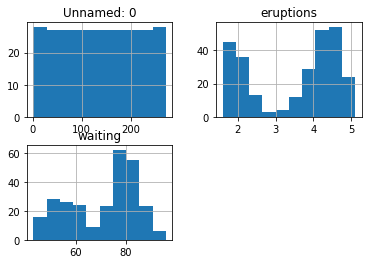

In [ ]:
#make a histogram

faithful_df.hist()

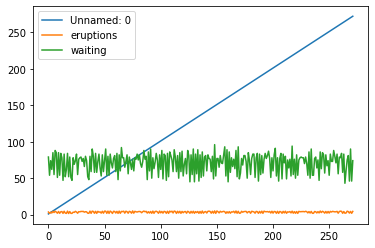

In [ ]:
faithful_df.plot()

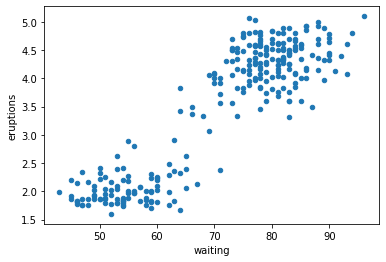

In [ ]:
faithful_df.plot(kind = 'scatter', x = 'waiting', y = 'eruptions')

## Practice
Play with your plots a little bit. Use this website for inspiration and code snippets:

https://bit.ly/2WPTwtW

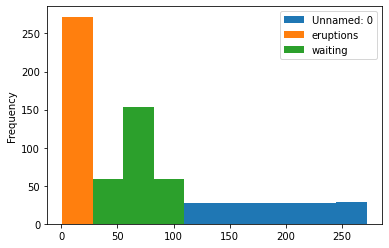

In [ ]:
faithful_df.plot.hist(alpha=1)

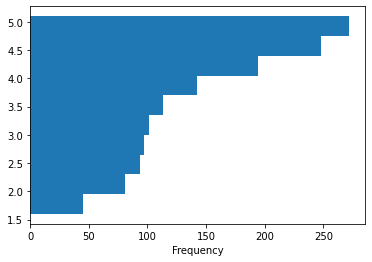

In [ ]:
faithful_df['eruptions'].plot.hist(orientation='horizontal', cumulative=True)

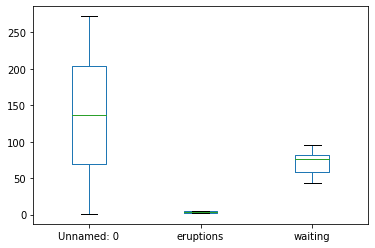

In [ ]:
faithful_df.plot.box()

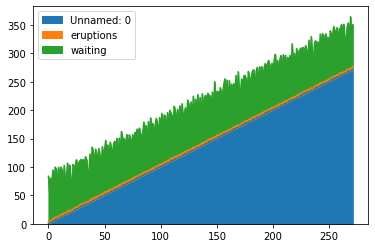

In [ ]:
faithful_df.plot.area();

#Let's analyze a dataset together

Data from NYC's 311 system. Use this website for information about the dataset, including a record layout:

[NYC Open Data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)



In [ ]:
import pandas as pd

df_311 = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/311_Service_Requests_from_2019May.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_311.head()

# YOUR TURN 4

Run some code to get to know your dataframe.

* Look at the first five rows.
* How many rows and columns are there
* What are the names of the columns?
* Quickly summarize the data in each numerical column. 
* Look at your results. Is this something that makes sense to do on this data? Why or why not?

In [ ]:
df_311.head(5)

In [ ]:
df_311.shape

In [ ]:
df_311.columns

In [ ]:
df_311.describe()

NO. Because it won't run on text columns. But works only on numerical data. That's why the table above does not show all the columns as it does not make sense of program to show standard deviation or mean or median (bc it is all texts) of the data set.

#Sorting data


In [ ]:
#defaults to ascending order
df_311.sort_values('Created Date')


In [ ]:
#use this for descending

df_311.sort_values('Created Date', ascending = False)

## Practice sorting

In [ ]:
df_311.sort_values('Agency')

In [ ]:
df_311.sort_values('Closed Date')

In [ ]:
df_311.sort_values('Closed Date', ascending = False)

In [ ]:
df_311.sort_values('City')

#Filtering columns

In [ ]:
#select a column

df_311['Complaint Type']


In [ ]:
#select multiple columns

df_311[['Complaint Type', 'Borough']]

In [ ]:
#create a new df out of them

df_311_2 = df_311[['Complaint Type', 'Borough']]

##Practice filtering by columns

In [ ]:
df_311['City']

In [ ]:
df_311[['City', 'Street Name']]

In [ ]:
df_311_2 = df_311[['City', 'Street Name']]

##Filtering by rows

In [ ]:
#create a new dataframe to hold our results

df_food_poisoning = df_311[df_311['Complaint Type'] == 'Food Poisoning']

df_food_poisoning

In [ ]:
#Add multiple criteria using & and or

df_food_poisoning_bronx = df_311[(df_311['Complaint Type'] == 'Food Poisoning') 
          & (df_311['Borough'] == 'BRONX')] 

df_food_poisoning_bronx

#will narrow down the result even more


In [ ]:
#filter for noise complaints

df_311[df_311['Complaint Type'] == 'Noise']

In [ ]:
#filter for noise complaints and count them 

df_311[df_311['Complaint Type'] == 'Noise'].count()

In [ ]:
#filter for noise complaints using fuzzy matching

df_311[df_311['Complaint Type'].str.contains('Noise')]

##Practice filtering by rows

In [ ]:
df_water_system = df_311[df_311['Complaint Type'] == 'Water System']

df_water_system

In [ ]:
df_311[df_311['City'] == 'BROOKLYN']

In [ ]:
df_311[df_311['Status'] == 'Closed']

In [ ]:
df_311[df_311['Status'] == 'Open']

#Aggregating data

Aggregating means putting data into groups and then doing math on those groups (counting, summing, averaging, etc)

Using group by to aggregate by certain columns

In [ ]:
#groups by borough and counts the number of unique keys
df_311.groupby(['Borough'])['Unique Key'].count()

Borough
BRONX            10925
BROOKLYN         22247
MANHATTAN        13133
QUEENS           18623
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

In [ ]:
df_311.groupby(['Borough'])['Unique Key'].count().sort_values(ascending=True)

Borough
Unspecified        861
STATEN ISLAND     3848
BRONX            10925
MANHATTAN        13133
QUEENS           18623
BROOKLYN         22247
Name: Unique Key, dtype: int64

In [ ]:
df_311.groupby(['Landmark'])['Unique Key'].count().sort_values(ascending=False)

Landmark
CENTRAL PARK              4
WASHINGTON SQUARE PARK    2
J F K AIRPORT             2
UNION SQUARE PARK         1
UNDERWOOD PARK            1
PS 44                     1
LA GUARDIA AIRPORT        1
GRAND CENTRAL TERM        1
FT TOTTEN                 1
CONEY ISLAND HOSPITAL     1
CITY HALL                 1
Name: Unique Key, dtype: int64

In [ ]:
df_311.groupby(['Complaint Type'])['Unique Key'].count().sort_values(ascending=False)

Complaint Type
Noise - Residential                    5838
Request Large Bulky Item Collection    5301
Illegal Parking                        5257
Blocked Driveway                       3391
Street Condition                       3080
                                       ... 
Mosquitoes                                1
Illegal Fireworks                         1
Disorderly Youth                          1
LinkNYC                                   1
Window Guard                              1
Name: Unique Key, Length: 186, dtype: int64

#Missing data
 
 There are a few ways to check for missing values.

In [ ]:
import numpy as np
df = {'A':[1,2,np.nan], 'B':[3,np.nan, np.nan]} #creating a sample df with missing values
df = pd.DataFrame(df) #convert to a dataframe

df

,A,B
0,1.0,3.0
1,2.0,NaN
2,NaN,NaN


In [ ]:
#check for any missing values
#isnull() works for small datasets but isn't practical for large ones
df.isnull()

,A,B
0,False,False
1,False,True
2,True,True


In [ ]:
#add up missing values by column
df.isnull().sum()

A    1
B    2
dtype: int64

In [ ]:
#add up total missing values
df.isnull().sum().sum()

3

#Practice

How many nans are in the 311 data?

In [ ]:
df_311.isnull().sum().sum()

231655

Dropping missing values

In [ ]:
#drop all rows with missing values
df.dropna()

,A,B
0,1.0,3.0


In [ ]:
#drop all  columns that contain nans
df.dropna(axis=1)

""
0
1
2


In [ ]:
df.fillna(3)

,A,B
0,1.0,3.0
1,2.0,3.0
2,3.0,3.0
